In [626]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [627]:
dataset = pd.read_csv('house_data.csv')

In [628]:
dataset.insert(5,'ones',1)

In [629]:
x = dataset.iloc[:,[5,6]]
y = dataset.iloc[:,2]

In [630]:
minValue = x.iloc[:,1].min() 
maxValue = x.iloc[:,1].max()
#meanValue = trainDataX.iloc[:,1].mean()

In [631]:
x.iloc[:,1] = (x.iloc[:,1] - minValue)/(maxValue - minValue)

C:\Users\kerols\OneDrive\Desktop\assiML\env\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [632]:
dataSize =  (int)(0.8 * len(x))
trainDataX = x[:dataSize]
testDataX = x[dataSize:]
trainDataY = y[:dataSize]
testDataY = y[dataSize:]

In [633]:
arrX = np.array(trainDataX)
arrY = np.array(trainDataY).flatten()
theta = np.array([0,0])

In [634]:
m = len(arrY)

In [635]:
def cost_function(x,y,theta,m):
    j = np.sum((x.dot(theta) - y) **2)/(2*m)
    return j

In [755]:
iterations = 10000
alpha = 0.35

In [762]:
def gradient_descent(x,y,theta,alpha,iterations,m):
    history = [0] * iterations
    for iter in range(iterations):
        hyp = x.dot(theta)
        loss = hyp - y
        gradient = x.T.dot(loss)/m
        theta = theta - (alpha * gradient)
        cost = cost_function(x,y,theta,m)
        #print(cost)
        history[iter] = cost
    return theta,history

In [763]:
(t,h) = gradient_descent(arrX,arrY,theta,alpha,iterations,m)
h[-1]

34012848737.6167

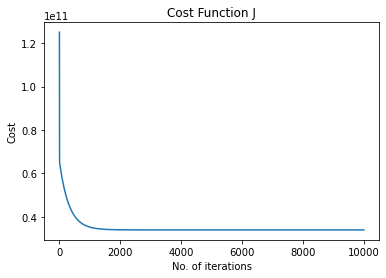

In [764]:
#34012848737.6167
#34012848737.616318
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(h)
plt.show()

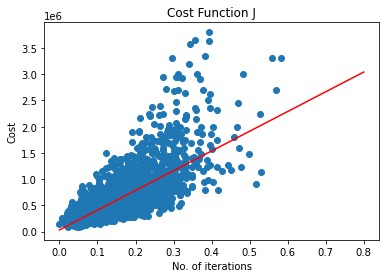

In [773]:
fitX = np.linspace(0,0.8,2)
fitY = [t[0] + t[1]*xx for xx in fitX]
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.scatter(testDataX.iloc[:,1],testDataY)
plt.plot(fitX,fitY, color='red')
plt.show()

In [766]:
cost_function(testDataX,testDataY,t,len(testDataX))

34849793653.47116

In [767]:
#34849793653.47116
t

array([  32465.70921348, 3761465.58093688])